In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install quandl

In [3]:
import quandl

In [4]:
data=quandl.get("NSE/TATAGLOBAL")

In [5]:
data.head(3)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31


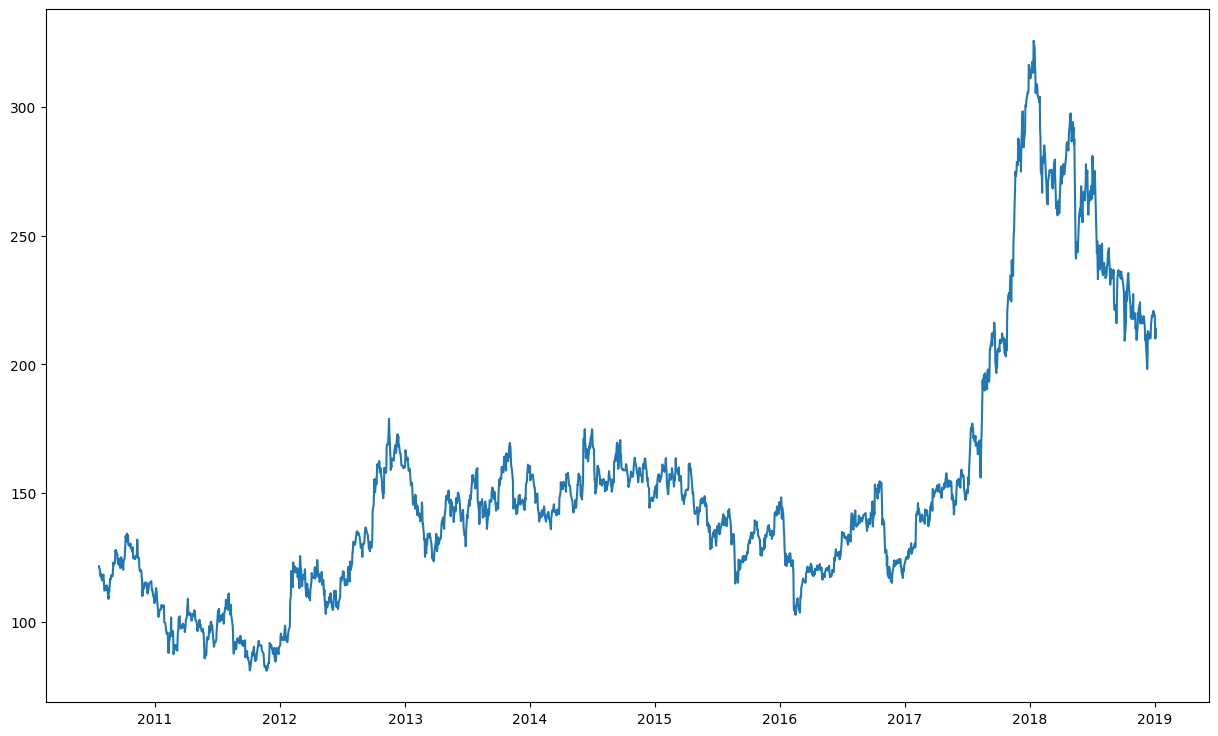

In [7]:
plt.figure(figsize=(15,9))
plt.plot(data['Close'], label='Closing Price')

In [10]:
data['Open-Close']=data['Open']-data['Close']
data['High - Low']=data['High']-data['Low']
data.dropna()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Open-Close,High - Low
Date,,,,,,,,,
2010-07-21,122.10,123.00,121.05,121.10,121.55,658666.0,803.56,0.55,1.95
2010-07-22,120.30,122.00,120.25,120.75,120.90,293312.0,355.17,-0.60,1.75
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312.0,340.31,1.15,1.70
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440.0,780.01,2.50,3.90
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100.0,694.98,-1.05,7.50
...,...,...,...,...,...,...,...,...,...
2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09,2.60,4.80
2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63,0.85,3.00
2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31,4.40,6.75


In [11]:
X=data[['Open-Close','High - Low']]
X.head(3)

,Open-Close,High - Low
Date,,
2010-07-21,0.55,1.95
2010-07-22,-0.60,1.75
2010-07-23,1.15,1.70


In [12]:
Y=np.where(data['Close'].shift(-1)>data['Close'],1,-1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.25, random_state=44)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [16]:
params={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn=neighbors.KNeighborsClassifier()
model=GridSearchCV(knn,params,cv=5)

In [17]:
model.fit(X_train,Y_train)
train_acc=accuracy_score(Y_train, model.predict(X_train))
test_acc=accuracy_score(Y_test, model.predict(X_test))
print("train accu:",train_acc)
print("test acc",test_acc)

train accu: 0.6755555555555556
test acc 0.5066666666666667


In [18]:
predictions_classify=model.predict(X_test)

In [19]:
actual_predicted_data=pd.DataFrame({'Actual Class':Y_test,'Predicted Score':predictions_classify})

In [20]:
actual_predicted_data.head(5
                           )

,Actual Class,Predicted Score
0,-1,1
1,1,1
2,1,-1
3,1,1
4,-1,-1


**Regression**

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [22]:
X_train_reg, X_test_reg, Y_train_reg, Y_test_reg= train_test_split(X,Y,test_size=0.25, random_state=44)

In [23]:
params={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg=neighbors.KNeighborsRegressor()
reg_model=GridSearchCV(knn_reg,params,cv=5)

In [24]:
reg_model.fit(X_train_reg,Y_train_reg)
predictions=reg_model.predict(X_test_reg)

In [ ]:
print(predictions)

In [26]:
rmse=np.sqrt(np.mean(np.power((np.array(Y_test_reg)-np.array(predictions)),2)))
rmse

1.0443377182890934

In [29]:
valid=pd.DataFrame({'Actual Class':Y_test_reg,'Predicted Score':predictions})

In [30]:
valid.head(3)

,Actual Class,Predicted Score
0,-1,0.200000
1,1,-0.066667
2,1,-0.466667
